## The code below requires packages
The packages are already installed, but must be imported so that Python has access to them

In [1]:
# Import required packages

# numpy is a package that contains a lot of mathematical operations
import numpy as np

# scipy is a large library and we are importing the fsolve package that is within optimize
# fsolve has the non-linear solver we will use to find the set of variable values that satisfy the system of equations
from scipy.optimize import fsolve

# seaborn is a plotting package
import seaborn as sns

# pdb stands for "python de-bug"
# the package has tools to help find mistakes in code
# it is not necessary to run the code below
from pdb import set_trace

## Example of a Function

In [2]:
def ComputeVolume(DimenionVector):
    Length = DimensionVector[0]
    Width = DimensionVector[1]
    Height = DimensionVector[2]
    Volume = Length*Width*Height
    return(Volume)

In [3]:
DimensionVector = [4,5,10]

In [ ]:
Volume = ComputeVolume(DimensionVector)
print(Volume)

## Determine the pH of a single acid in solution.

Define a function that will return a vector of 9 zeros when the system of equations is solved.

In [6]:
# Define the function containing the system of equilibrium equations.

def equilibrium_equations_1(x,Acid_Concentration,pKa):
    # Inputs:
    #   x is a vector of the unknown variables

    # Define constant or given values values
    #   You would change these values depending on the acid and it's concentration
    
    # constrain the domain of possible roots to positive roots
    #    the domain is concentration space, and only positive concentrations make sense 
    x = abs(x)
    
    
    Ka = 10**(-pKa) # this is Python syntax for 10 raised to the -pKa power
    
    H2Oi = x[0]
    H2O = x[1]
    OH = x[2]
    K_eq_w = x[3]
    H = x[4]
    HAi = x[5]
    A = x[6]
    HA = x[7]
    
    # For each equation in the system, move everything over to the right side so that the left side is 0.
    
    # The number of oxygen atoms in the system is not changing
    # H2Oi = H2O + OH
    zero_1 = H2O + OH - H2Oi
    
    # The concentration of water is known becuase its density is known
    # H2Oi = 55.5
    zero_2 = 55.5 - H2Oi
    
    # Water dissociation constant definition
    # K_eq_w = H*OH/H2O
    zero_3 = H*OH/H2O - K_eq_w
    
    # Water dissociation constant is known
    # K_eq_w = 1.8e-16
    zero_4 = 1.8e-16 - K_eq_w
    
    # Initial concentration of acid is provided
    # HAi = 1
    zero_5 = Acid_Concentration - HAi
    
    # Acid dissociation constant definition
    # Ka = H*A/HA
    zero_6 = H*A/HA - Ka
    
    # The initial moles of A present are equal to the final moles present
    # HAi = HA + A
    zero_7 = HA + A - HAi
    
    # The initial moles of H present is equal to the final moles of H present
    # 2*H2O + HAi = H + 2*H2O + HA
    zero_8 = H + 2*H2O + HA - 2*H2Oi - HAi

    
    #Array_To_Return = np.array([root_1,root_2,root_3,root_4,root_5,root_6,root_7,root_8,root_9])
    Array_To_Return = [zero_1,zero_2,zero_3,zero_4,zero_5,zero_6,zero_7,zero_8]
    
    return(Array_To_Return)


## Determine the set of unkonwn variable values that satisfies the system of equations

In [13]:
# solve the system of equations describing the equilibrium of the acid/base mixture

# provide an initial guess
# fsolve works by guessing values for the variables and determining if they solve the system of equations
#     fsolve iteratively guesses until it finds a set of variables that satisfies the equations
guess = [1,1,1,1,1,1,1,1]

# find the solution to the system of equations using fsolve
#     the first argument passed to fsolve is a function containing the system of equations to be solved
#     the second argument is the vector with initial guesses
Acid_Concentration = 1
pKa = 6.86
root_array = fsolve(equilibrium_equations_1,x0=guess,args=(Acid_Concentration,pKa))
# roots are the values of the vector that will make the function return all zeros
#     fsolve finds roots, so we designed our function to have roots where our system of equations is satisified

# because we wrote the function we know the 5th variable is the H+ concentration (index #4 in python)
#     note that python indexes starting from 0 (other programming languages may start from 1)
pH = -np.log10(root_array[4])
print(pH)

3.429419654369619


## Determine the titration curves for multiple acids.

The new function with the equilibrium equations accepts pKa and moles of NaOH as inputs

In [23]:
# Define the function containing the system of equilibrium equations.

def equilibrium_equations_2(x,pKa,NaOH,Acid_Concentration):
    # Inputs:
    #   x is a vector of the unknown variables
    #   pKa is the pKa of the acid of interest
    #   NaOH is the moles of strong base in the titration

    # constrain the domain of possible roots to positive roots
    #    the domain is concentration space, and only positive concentrations make sense 
    x = abs(x)
    
    # Specify properties of the acid in solution
    Ka = 10**(-pKa)
    
    # unpack the array of variables
    H2Oi = x[0]
    H2O = x[1]
    OH = x[2]
    K_eq_w = x[3]
    H = x[4]
    HAi = x[5]
    A = x[6]
    HA = x[7]
    
    # Define the system of equations describing the equilibrium
    
    # Initial moles of oxygen equals final moles of oxygen
    # NaOH + H2Oi = H2O + OH
    # note that NaOH appears in the species balance for OH
    zero_1 = H2O + OH - H2Oi - NaOH
    
    # Concentraiton of water known from it's density
    # H2Oi = 55.5
    zero_2 = 55.5 - H2Oi
    
    # Definition of water dissociation constant
    # K_eq_w = H*OH/H2O
    zero_3 = H*OH/H2O - K_eq_w
    
    # Water dissociation constant is known
    # K_eq_w = 1.8e-16
    zero_4 = 1.8e-16 - K_eq_w
    
    # Initial concentration of acid is provided
    # HAi = 1
    zero_5 = Acid_Concentration - HAi
    
    # Ka = H*A/HA
    zero_7 = H*A/HA - Ka
    
    # HAi = HA + A
    zero_8 = HA + A - HAi
    
    #2*H2Oi + HAi + NaOH = H + 2*H2O + HA + OH
    zero_9 = OH + H + 2*H2O + HA - 2*H2Oi - HAi - NaOH

    
    # Define the array the function returns
    #     This should all be zeros when the system of equations is satisfied
    Array_To_Return = [zero_1,zero_2,zero_3,zero_4,zero_5,zero_7,zero_8,zero_9]
    
    return(Array_To_Return)

## Create a function that will generate a titration curve for individual acids
This function needs to solve the system of equations for many values of NaOH <br>
It uses a "for loop" to do so

For loop example

In [9]:
ExampleVector = [1,2,3]
InitialVector = [0,0,0]
LoopIterator = 0
for value in ExampleVector:
    InitialVector[LoopIterator] = 100*value
    LoopIterator = LoopIterator+1

In [10]:
print(InitialVector)

[100, 200, 300]


Define function to produce titration curve for individual acids

In [22]:
# Define the function that generates the pH curve for a given acid pKa and array of NaOH equivalents

def pH_curve(pKa,NaOH_array,Acid_Concentration):    
    # solve the system of equations describing the equilibrium of the acid/base mixture

    # provide an initial guess
    # fsolve works by guessing values for the variables and determining if they solve the system of equations
    #     fsolve iteratively guesses until it finds a set of variables that satisfies the equations
    guess = [1,1,1,1,1,1,1,1]

    # find the solution to the system of equations using fsolve
    #     the first argument passed to fsolve is a function containing the system of equations to be solved
    pH_array = np.zeros(len(NaOH_array))
    i = 0

    for NaOH in NaOH_array:
        # use the previous roots as the next guess
        if i>0:
            guess = 3*root_array

        # solve for the roots
        root_array = fsolve(equilibrium_equations_2,x0=guess,args=(pKa,NaOH,Acid_Concentration))

        # because we wrote the function we know the 5th variable is the H+ concentration (index #4 in python)
        pH = -np.log10(abs(root_array[4]))
        pH_array[i] = pH

        # iterate the loop counter
        i = i+1
    
    return(pH_array)

Produce the titration curve plots (same as figure 2-17)

[Text(0.5, 0, 'Equivalents Base Added')]

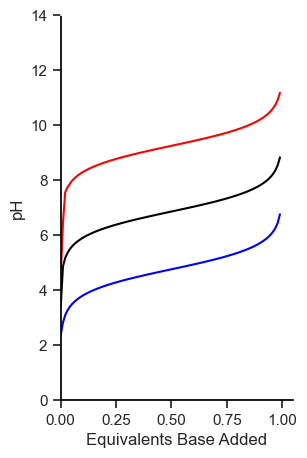

In [26]:
# Plot the findings

# Define an NaOH array
NaOH_array = np.arange(0,1,0.01)
Acid_Concentration = 1

# Solve for the pH curves for 3 acids in figure 2-17
pH_array_1 = pH_curve(4.76,NaOH_array,Acid_Concentration)
pH_array_2 = pH_curve(6.86,NaOH_array,Acid_Concentration)
pH_array_3 = pH_curve(9.25,NaOH_array,Acid_Concentration)

# Set asthetic properties of the graph
sns.set(rc={"figure.figsize":(3, 5), \
           'axes.facecolor':'FFFFFF', \
           'axes.edgecolor': 'white', \
           'ytick.left': True, \
           'xtick.bottom': True, \
           },
       font_scale = 1.0)

# Define the plot lines
p = sns.lineplot(x=NaOH_array,y=pH_array_1,color='blue')
p = sns.lineplot(x=NaOH_array,y=pH_array_2,color='black')
p = sns.lineplot(x=NaOH_array,y=pH_array_3,color='red')

# Set other asthetic values of the plot
p.spines['left'].set_color('black')
p.spines['bottom'].set_color('black')
p.set(ylim=(0, 14))
p.set(xlim=(0, 1.05))
p.axhline(0,color='black',linewidth=1)
p.set(xlabel=None)
p.set(ylabel='pH')
p.set(xlabel='Equivalents Base Added')

# Create the plot legend - not rendering correctly
#p.legend(labels=['Acetic Acid','Dihydrogenphosphate','Ammonium'],frameon=False)

